#        Machine Learning Assignment2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('Titanic Dataset.xlsx')

In [3]:
data.shape

(891, 12)

# Q1: EDA

Analyze the columns Sex and Survived. People who did not survive are
more likely to be of which sex?
Analyze the columns Pclass and Survived. People who did not survive are
more likely to be of which class?
Use count plots, histograms, boxplots etc.


In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

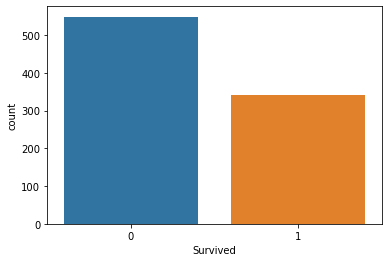

In [6]:
sns.countplot(x = 'Survived', data = data)
plt.show()

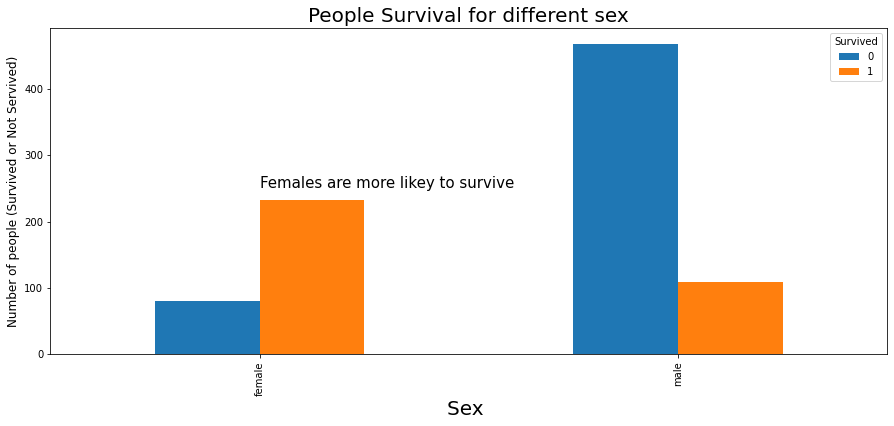

In [7]:
pd.crosstab(data.Sex,data.Survived).plot(kind="bar",figsize=(15,6))
plt.title('People Survival for different sex', size = 20)
plt.xlabel('Sex ', size = 20)
plt.ylabel('Number of people (Survived or Not Servived)', size = 12)
plt.text(.001,250,"Females are more likey to survive", size = 15)
plt.show()

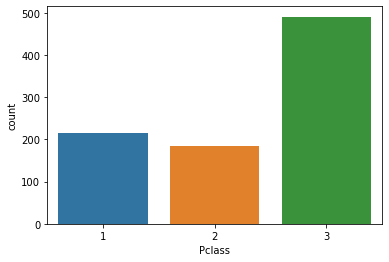

In [8]:
sns.countplot(x = 'Pclass', data = data)
plt.show()

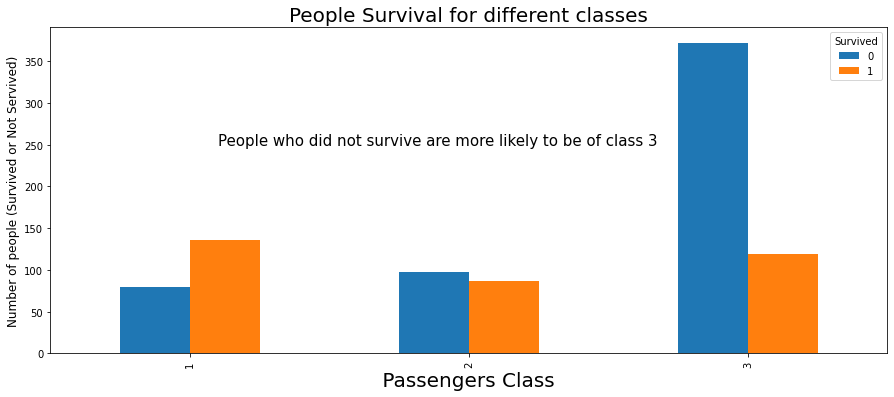

In [9]:
pd.crosstab(data.Pclass,data.Survived).plot(kind="bar",figsize=(15,6))
plt.title('People Survival for different classes', size = 20)
plt.xlabel(' Passengers Class ', size = 20)
plt.ylabel('Number of people (Survived or Not Servived)', size = 12)
plt.text(.1,250,"People who did not survive are more likely to be of class 3", size = 15)
plt.show()

# Q2 Missing Data handling

Which features have missing data and how can they be handled?  
Hint: Check average age by passenger class. You can use the average age
based on the pclass to fill in the missing data?


In [10]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


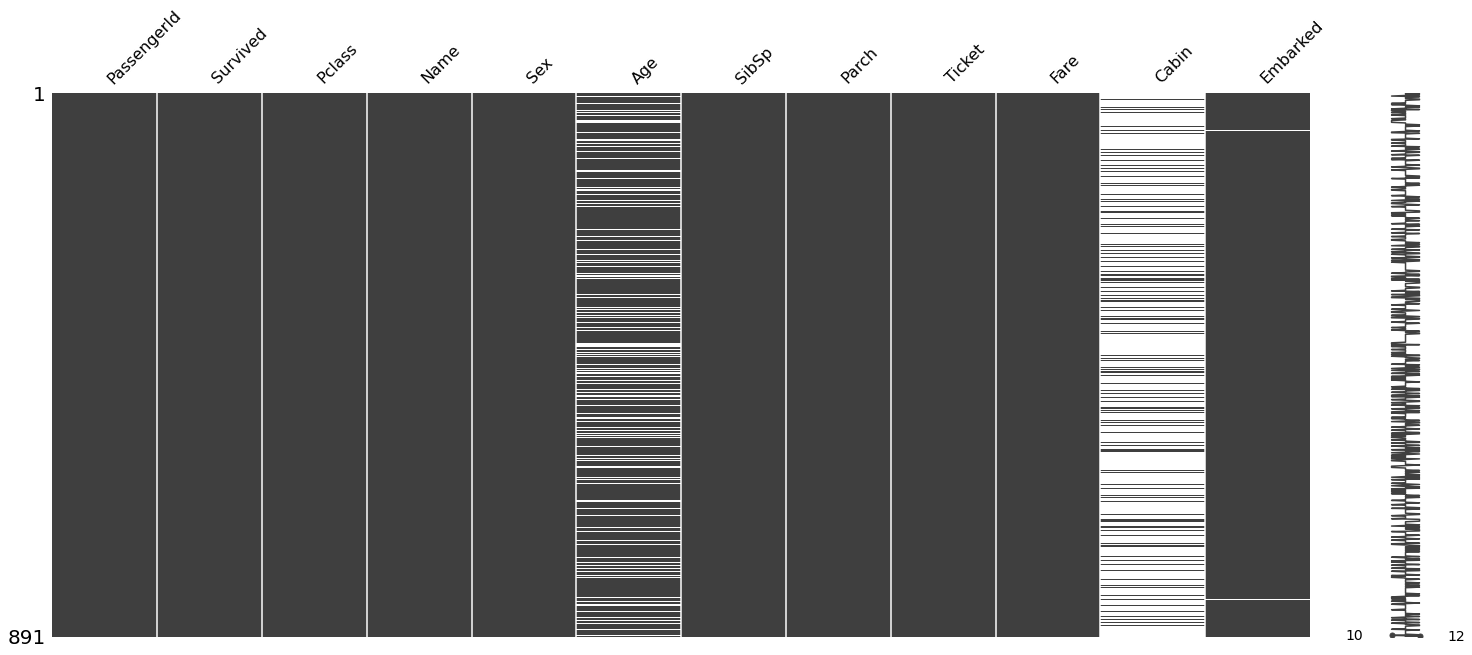

In [11]:
import missingno as msno
msno.matrix(data)
plt.show()

In [12]:
data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
# Average Age

data["Age"].mean()

29.69911764705882

In [14]:
# Replace missing age with average age

data['Age'] = data['Age'].replace(np.NaN, 30)

In [15]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
# Droping cabin colum as it has many missing values

data1 = data.drop(['Cabin'] , axis = 1)


In [17]:
data1.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [18]:
data1['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [19]:
# eplacing missing value with P in Embarked feature
data1['Embarked'] = data1['Embarked'].replace(np.NaN, 'P')

In [20]:
data1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [21]:
data1.shape

(891, 11)

# Q3

#### Does the Ticket column hold any significance for our model or can it be dropped?  Are there any columns that can be dropped before building the model?

In [22]:
data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Ticket column represents ticket number and it does not seems relevant to survival of passengers, it can be dropped.  
Other than that name and PassengerId.

In [23]:
data2 = data1.drop(['Name','Ticket','PassengerId'] , axis = 1)

In [24]:
data2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [25]:
data2.shape

(891, 8)

# Q4

#### Convert categorical features to dummy variables (using pandas get_dummies()).  Analyze whether it is necessary to use all the generated columns or would it be wise to drop some.

In [44]:
data2['SibSp'].unique() , data2['Embarked'].unique() , data2['Parch'].unique() , data2['Pclass'].unique(), data2['Sex'].unique()

(array([1, 0, 3, 4, 2, 5, 8], dtype=int64),
 array(['S', 'C', 'Q', 'P'], dtype=object),
 array([0, 1, 2, 5, 3, 4, 6], dtype=int64),
 array([3, 1, 2], dtype=int64),
 array(['male', 'female'], dtype=object))

In [45]:
a = pd.get_dummies(data2['Sex'], prefix = "sex")
b = pd.get_dummies(data2['Embarked'], prefix = "Emb")


In [46]:
b

,Emb_C,Emb_P,Emb_Q,Emb_S
0,0,0,0,1
1,1,0,0,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
886,0,0,0,1
887,0,0,0,1
888,0,0,0,1
889,1,0,0,0


In [47]:
frames = [data2, a, b]
data3 = pd.concat(frames, axis = 1)
data3.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,sex_female,sex_male,Emb_C,Emb_P,Emb_Q,Emb_S
0,0,3,male,22.0,1,0,7.2500,S,0,1,0,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,0,1,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,1,0,0,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,1,0,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,0,1,0,0,0,1


In [48]:
data4 = data3.drop(columns = ['Sex', 'Embarked'])
data4.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,sex_female,sex_male,Emb_C,Emb_P,Emb_Q,Emb_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,0,1


In [49]:
y = data4.Survived.values
x_data = data4.drop(['Survived'], axis = 1)

In [50]:
x_data.shape , y.shape

((891, 11), (891,))

# Q5

#### Now use 70% of data as training data and rest as test data. Ensure that you are not left with any null values before doing the train test split.


In [35]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [64]:
x_data.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
sex_female    0
sex_male      0
Emb_C         0
Emb_P         0
Emb_Q         0
Emb_S         0
dtype: int64

In [66]:
# No null values found, we can procede for train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=0)


# Q6 

#### Fit a logistic regression model on the training set.


In [67]:
lr = LogisticRegression()
lr.fit(x_train,y_train)


LogisticRegression()

# Q7

#### Predict Survived feature for the test data.


In [68]:
predictions = lr.predict(x_test)

In [69]:
predictions

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1], dtype=int64)

In [70]:
prediction_probabilities = lr.predict_proba(x_test)

In [71]:
prediction_probabilities[0:10]

array([[0.83764367, 0.16235633],
       [0.89603898, 0.10396102],
       [0.87734121, 0.12265879],
       [0.0649038 , 0.9350962 ],
       [0.31306743, 0.68693257],
       [0.56911548, 0.43088452],
       [0.10871758, 0.89128242],
       [0.10240031, 0.89759969],
       [0.4503894 , 0.5496106 ],
       [0.2855822 , 0.7144178 ]])

# Q8 

#### Evaluate the model.

In [72]:
acc = lr.score(x_test,y_test)*100

In [73]:
print("Logistic Regression Accuracy is {0}%".format(round(acc,2)))

Logistic Regression Accuracy is 79.85%
